In [145]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree

In [146]:
class constants:
    directory="C:/Users//OneDrive - Nokia/personal/DataScience/Amity/Course/ProjectWork/data/"
    train=directory+"TRAIN.csv"
    test=directory+"TEST.csv"
    test_size=0.3
    output_file=directory+"submission_two.csv"

In [147]:
df_train=pd.read_csv(constants.train)
df_test=pd.read_csv(constants.test)

# Data Pre-processing

In [148]:
def load_data(file_train,file_test):
    '''
    This function loads the training and testing data from the provided files.
    The data is preprocessed and returned for modeling
    '''

    #Load the csv files
    train = pd.read_csv(file_train)
    test = pd.read_csv(file_test)
    
    #Remove irrelevant columes
    train = train.drop(['Customer ID'], axis=1)
        
    
    #Categorical colums
    categorical_feature=['Most Loved Competitor network in in Month 1',\
                     'Most Loved Competitor network in in Month 2',\
                     'Network type subscription in Month 1',\
                     'Network type subscription in Month 2'
                    ]
    for idx,feat in enumerate (categorical_feature):
    #Data imputatio
    
        train[[feat]] = train[[feat]].fillna('0')
        test[[feat]] = test[[feat]].fillna('0')

        #Convert categorical features to a one-hot representation (traning data)
        train[feat] = pd.Categorical(train[feat])
        if idx < 2:
            dummies = pd.get_dummies(train[feat], prefix = f'most_loved_month_{idx+1}')
        else:
            dummies = pd.get_dummies(train[feat], prefix = f'most_type_month_{idx-1}')
        train = pd.concat([train,dummies],axis=1)

        #Convert categorical features to a one-hot representation (testing data)
        test[feat] = pd.Categorical(test[feat])
        if idx < 2:
            dummies = pd.get_dummies(test[feat], prefix = f'most_loved_month_{idx+1}')
        else:
            dummies = pd.get_dummies(test[feat], prefix = f'most_type_month_{idx-1}')
        test = pd.concat([test,dummies],axis=1)

        #Drop the original column
        train = train.drop([feat],axis=1)
        test = test.drop([feat],axis=1)
    
    return (train , test)
    

        

In [149]:
train,test = load_data(constants.train, constants.test)
train.dropna(inplace=True)
test.dropna(inplace=True)

# We split the data into the Train & Validation sets

In [150]:
# split data into X and Y
X = train.drop(['Churn Status'], axis=1)
Y = train['Churn Status']

# split data into train and test sets
seed = 7
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [151]:
X_eval = test

In [152]:
print(f"Training set size: {len(X_train.index)}")
print(f"Validation set size: {len(X_test.index)}")
print(f"Test set size: {len(X_eval.index)}")

Training set size: 979
Validation set size: 420
Test set size: 600


# Model Development
Predicting churn is a binary classification problem. Customers either churn or retain in a given period.

We can’t tell without experimenting that which classification algorithm is best fit for the problem in consideration. 
Therefore, we tried many different classification algorithms for our problem, while using a hold-out “test set” of data to evaluate performance and selected the winner. 

In [153]:
classifiers=[]
model1 = xgboost.XGBClassifier()
classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)

# The accuracy_score function computes the accuracy, either the fraction (default) or the count (normalize=False) of correct predictions.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

From the below result it is clear that Gradient Boosting technique performed best.  
Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function. 

We are using XGBoost classifier



In [154]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of %s is %s"%(clf, cm))    

Accuracy of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) is 0.8452380952380952
Confusion Matrix of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) is [[1

C:\Users\p42singh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\p42singh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Accuracy of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is 0.7595238095238095
Confusion Matrix of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                 

# we want to know which features our model exactly used from the dataset. Also, which were the most important ones?

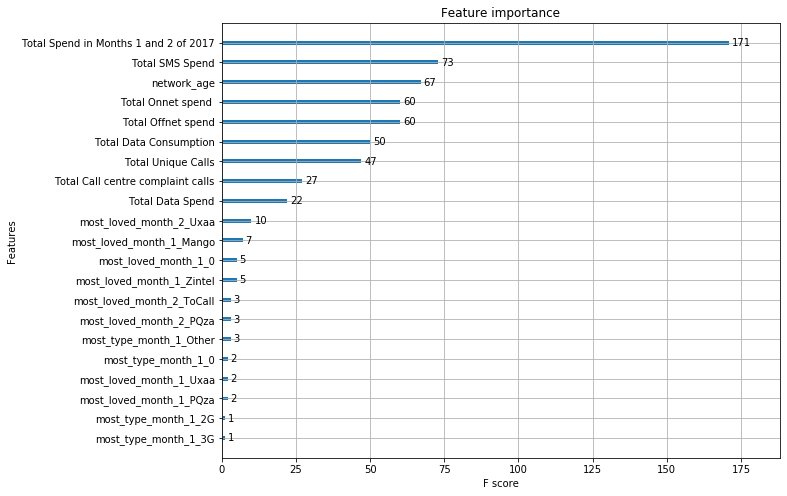

In [155]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(model1, ax=ax, importance_type="weight")

We can see that our model assigned more importance to "Total Spend in Month 1 and 2 of 2017" compared to others.

## Finally, the best way to use this model is assigning Churn Probability for each customer.:

In [156]:
df_train['Churn Probability'] = model1.predict_proba(train[X.columns])[:,1]
df_train[['Customer ID','Churn Status', 'Churn Probability']]

,Customer ID,Churn Status,Churn Probability
0,ADF0039,0,0.326988
1,ADF0041,0,0.399011
2,ADF0051,0,0.039999
3,ADF0059,0,0.035438
4,ADF0060,0,0.055223
5,ADF0066,0,0.665062
6,ADF0068,0,0.489921
7,ADF0072,1,0.981483
8,ADF0079,1,0.972985
9,ADF0085,1,0.958145
